In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
sigmoid = lambda x:1/(1+ np.exp(-x))

def draw(x1, x2):
    plt.plot(x1, x2)
    

def calculate_error(points, y, line_parameters):
    p = sigmoid(points * line_parameters)
    cross_entropy = -sum(y.T*np.log(p) + (1-y).T*np.log(1-p))
    return cross_entropy

def gradient_descend(alpha=.03):
    global all_points, y, line_parameters
    m = all_points.shape[0]
    for i in range(5000):
        p = sigmoid(all_points * line_parameters)
        gradient = (all_points.T * (p-y))/ m
        line_parameters = line_parameters - alpha * gradient
        x1 = np.array([all_points[:, 0].min(), all_points[:, 0].max()])
        w1, w2, b = np.asarray(line_parameters).flatten()
        x2 = -b/w2 + x1*(-w1/w2)
    draw(x1, x2)

In [22]:
n_pts = 100
np.random.seed(0)
b = np.ones(n_pts)
w1 = -.1
w2 = -.35
b = 3.5
line_parameters = np.matrix([w1, w2, b]).T
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
x2 = -b/w2 + x1*(-w1/w2)


In [23]:
all_points = np.vstack([top_region, bottom_region])
all_points = np.hstack([all_points, np.ones((2*n_pts, 1))])
y = np.vstack([np.ones((n_pts, 1)), np.zeros((n_pts, 1))])

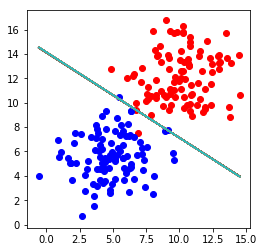

In [27]:
_, ax = plt.subplots(figsize=(4, 4))
ax.scatter(top_region[:, 0],top_region[:, 1],color='r')
ax.scatter(bottom_region[:, 0],bottom_region[:, 1],color="b")
import time
for i in range(100):
    gradient_descend()
plt.show()